# Group 5 : W15 Activity

Jio fibre wants to implement AI/ML in their systems. The activity task
is to build a network intrusion detector, a predictive model capable of
distinguishing between bad connections, called intrusions or attacks, and good normal connections.
This database contains a standard set of data to be audited, which
includes a wide variety of intrusions in the network environment. Your
target is building a machine efficient learning model using
probabilistic approach models, probabilities of bad or good
connections using naïve bayes model. This is a multi-class
classification. Fine tune the model and make a model which has at
least 97 percent accuracy.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('W15tcp.csv')

In [3]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion
0,0,b'udp',b'domain_u',b'SF',44,134,0,0,0,0,...,89,0.64,0.01,0.01,0.00,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'smtp',b'SF',1489,385,0,0,0,0,...,116,1.00,0.00,0.20,0.02,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
3,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,b'smurf.'
4,0,b'tcp',b'private',b'S0',0,0,0,0,0,0,...,6,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,b'neptune.'


### PreProcessing

In [4]:
data['intrusion'].value_counts()

b'smurf.'              280790
b'neptune.'            107201
b'normal.'              97278
b'back.'                 2203
b'satan.'                1589
b'ipsweep.'              1247
b'portsweep.'            1040
b'warezclient.'          1020
b'teardrop.'              979
b'pod.'                   264
b'nmap.'                  231
b'guess_passwd.'           53
b'buffer_overflow.'        30
b'land.'                   21
b'warezmaster.'            20
b'imap.'                   12
b'rootkit.'                10
b'loadmodule.'              9
b'ftp_write.'               8
b'multihop.'                7
b'phf.'                     4
b'perl.'                    3
b'spy.'                     2
Name: intrusion, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

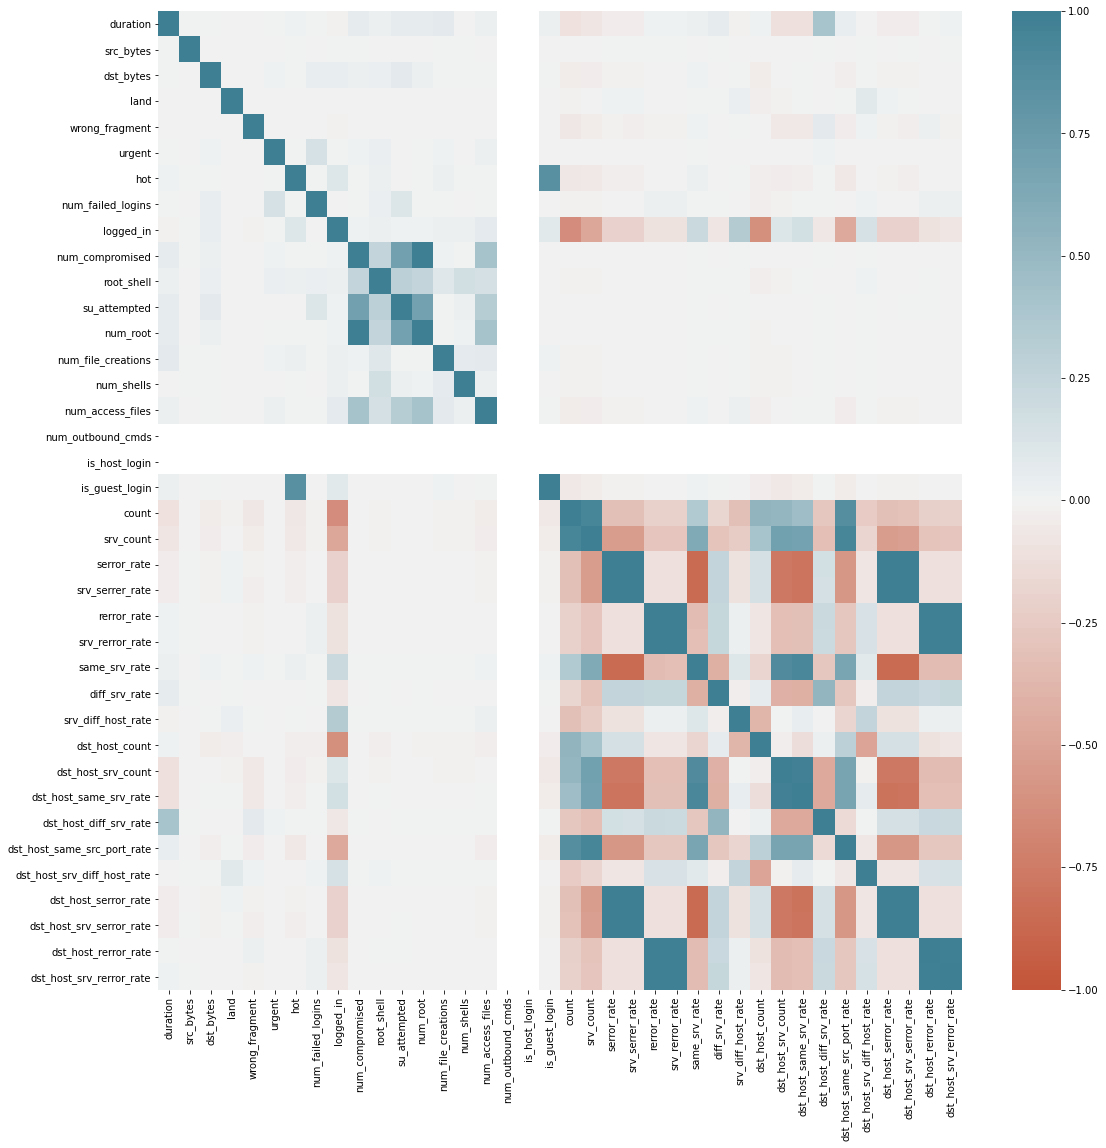

In [6]:
#Checking for Correlation and feature reduction 

plt.figure(figsize=(18,18))
sns.heatmap(data.corr(),vmin=-1,cmap=sns.diverging_palette(20, 220, n=200))
plt.show()

In [7]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serrer_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'intrusion'],
      dtype='object')

<pre>
From these preprocessing
1) 'num_outbound_cmds','is_host_login' does not hold enough significence in dataset so they can be removed
2) 'protocol_type','service','flag' are object type, so can be removed

heatmap it is clear that the folloeing columns are highly corrilated and can remove either one
1) 'dst_host_serror_rate' and 'dst_host_srv_serror_rate'
2) 'num_compromised' and 'num_root' 
3) 'hot' and 'is_guest_login' 
4) 'srv_rerror_rate' and 'rerror_rate' 
5) 'serror_rate' and 'srv_serrer_rate'
6) 'dst_host_srv_count' and 'dst_host_same_srv_rate'
7) 'dst_host_rerror_rate' and 'dst_host_srv_rerror_rate'

In [8]:
data1 = data.drop(['protocol_type','service','flag','num_outbound_cmds','is_host_login','dst_host_serror_rate','num_compromised','hot','srv_rerror_rate','srv_serrer_rate','dst_host_same_srv_rate','dst_host_srv_rerror_rate'],axis=1)

In [9]:
data1.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,num_failed_logins,logged_in,root_shell,su_attempted,...,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,intrusion
0,0,44,134,0,0,0,0,0,0,0,...,0.00,0.01,139,89,0.01,0.01,0.00,0.0,0.0,b'normal.'
1,0,1489,385,0,0,0,0,1,0,0,...,0.00,1.00,5,116,0.00,0.20,0.02,0.0,0.0,b'normal.'
2,0,1032,0,0,0,0,0,0,0,0,...,0.00,0.00,255,255,0.00,1.00,0.00,0.0,0.0,b'smurf.'
3,0,1032,0,0,0,0,0,0,0,0,...,0.00,0.00,255,255,0.00,1.00,0.00,0.0,0.0,b'smurf.'
4,0,0,0,0,0,0,0,0,0,0,...,0.07,0.00,255,6,0.07,0.00,0.00,1.0,0.0,b'neptune.'


### Modelling

In [10]:
y=data1['intrusion']
x=data1.drop(['intrusion'],axis=1)

In [11]:
#Normalising dataset x

from sklearn import preprocessing
x = preprocessing.normalize(x)
x = pd.DataFrame(x)

In [12]:
#splitting the model for traing and validating
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [13]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
#evaluating the performance of the model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('\nClassification report\n',classification_report(y_test,y_pred))


Classification report
                      precision    recall  f1-score   support

           b'back.'       0.92      0.99      0.95       547
b'buffer_overflow.'       0.01      0.58      0.02        12
      b'ftp_write.'       0.00      0.00      0.00         0
   b'guess_passwd.'       0.92      1.00      0.96        11
           b'imap.'       0.00      0.80      0.01         5
        b'ipsweep.'       0.04      0.17      0.06       311
           b'land.'       0.24      1.00      0.38         4
     b'loadmodule.'       0.00      0.33      0.01         3
       b'multihop.'       0.01      1.00      0.03         1
        b'neptune.'       1.00      1.00      1.00     26869
           b'nmap.'       0.03      0.95      0.06        59
         b'normal.'       1.00      0.14      0.24     24307
           b'perl.'       0.00      0.00      0.00         1
            b'phf.'       1.00      1.00      1.00         2
            b'pod.'       0.46      0.96      0.63        53

In [16]:
from sklearn.naive_bayes import BernoulliNB
classifier=BernoulliNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [17]:
#evaluating the performance of the model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('\nClassification report\n',classification_report(y_test,y_pred))


Classification report
                      precision    recall  f1-score   support

           b'back.'       0.79      0.79      0.79       547
b'buffer_overflow.'       0.83      0.42      0.56        12
      b'ftp_write.'       0.00      0.00      0.00         0
   b'guess_passwd.'       1.00      1.00      1.00        11
           b'imap.'       0.00      0.00      0.00         5
        b'ipsweep.'       0.14      0.66      0.23       311
           b'land.'       0.80      1.00      0.89         4
     b'loadmodule.'       0.00      0.00      0.00         3
       b'multihop.'       0.00      0.00      0.00         1
        b'neptune.'       1.00      1.00      1.00     26869
           b'nmap.'       0.46      0.44      0.45        59
         b'normal.'       0.98      0.93      0.95     24307
           b'perl.'       0.50      1.00      0.67         1
            b'phf.'       0.00      0.00      0.00         2
            b'pod.'       1.00      0.75      0.86        53

##### BernaulliNB Model is the best fit model with an accuracy of 0.98